# Sample Project: Baseball Analysis


## Objective
The General Manager of the Pittsburgh Pirates baseball team has asked us to provide insight on their pitchers by analyzing StatCast and body characteristics data provided by the team. The Pittsburgh Pirates want to build a model to predict pitch performance based on features like pitch outcome (event), velocity, arm length, age and body mass index (bmi).

## Import Data
The Pittsburgh Pirates have supplied us with two data sets for our analysis. The first dataset is collected [StatCast](https://baseballsavant.mlb.com/) data and the other dataset is the [team rosters](http://www.baseball-almanac.com/teamstats/roster.php?y=2018&t=PIT) data, both for the 2015 - 2018 seasons.

First thing we need to do is get that data into our environment quickly. Importing flat files using the **Pandas** package is considered the standard and best practice approach in **Python**.

In [22]:
import pandas as pd
import numpy as np
import os

# Store current working directory: curr_wd
curr_wd = os.getcwd()

# Store file name: file_statcast
file_statcast = 'savant_data-Pirates_20182015.csv'

# Load file as a Pandas Dataframe: df_statcast_pirates
df_statcast_pirates = pd.read_csv(curr_wd + '/data_sources/' + file_statcast, parse_dates=['game_date'])

#Review the shape (rows, columns) of df_statcast_pirates
print(df_statcast_pirates.shape)

(23580, 89)


In [23]:
# Store file name: file_rosters
file_rosters = 'Pittsburgh_Pirates_Roster_2015_2018.csv'

# Load file as a Pandas Dataframe: df_rosters_pirates
df_rosters_pirates = pd.read_csv(curr_wd + '/data_sources/' + file_rosters, parse_dates=['Date Of Birth'])

# Review the shape (rows, columns) of df_rosters_pirates
print(df_rosters_pirates.shape)

(196, 9)


## Data Exploration & Cleansing
Now that we have our datasets loaded into our environments we can move on to our Data Cleansing and Exploration phase. I chose not to break these two topics out into different sections/stages because alot of times during data exploration we discover cleansing that is needed to improve our analysis.

Cleaning data is important because its rare that data is provided that does not need cleaning or preprocessing prior to diving into your analysis. We want will take some time now to diagnose any common data problems such as: inconsistant column names, missing data, outliers, duplicate rows, column type with unexpected values, etc. 

We will also want to take into account the principles of tidy data as we shape and cleanse our data:
1. Columns represent separate variables
2. Rows represent individual observations
3. Observational units form tables

In [24]:
# Visually inspect the data in df_rosters_pirates by looking at the first and last 5 rows.
print(df_rosters_pirates.head())
print(df_rosters_pirates.tail())

   Year Position   #               Player Height  Weight Throws   Bats  \
0  2015  Pitcher  59     Antonio Bastardo   5-11     202   Left  Right   
1  2015  Pitcher  55          Joe Blanton   6-03     225  Right  Right   
2  2015  Pitcher  34         A.J. Burnett   6-04     230  Right  Right   
3  2015  Pitcher  37  Arquimedes Caminero   6-04     245  Right  Right   
4  2015  Pitcher  45          Gerrit Cole   6-04     225  Right  Right   

  Date Of Birth  
0    1985-09-21  
1    1980-12-11  
2    1977-01-03  
3    1987-06-16  
4    1990-09-08  
     Year    Position   #           Player Height  Weight Throws   Bats  \
191  2018  Outfielder  47    Jordan Luplow   6-01     195  Right  Right   
192  2018  Outfielder   6   Starling Marte   6-01     190  Right  Right   
193  2018  Outfielder  17   Austin Meadows   6-03     210   Left   Left   
194  2018  Outfielder  25  Gregory Polanco   6-05     235   Left   Left   
195  2018  Outfielder  15      Pablo Reyes   5-08     170  Right  Right 

Clean up Height column 1) string 2) convert to easier format - inches

In [25]:
# Feet to Inches convert function
fn_height_convert = lambda x: int(x.split('-')[0])*12 + int(x.split('-')[1])

# Clean Height column by converting string representation of feet to numeric representation of inches: height_inc
df_rosters_pirates['Height (Inches)'] = df_rosters_pirates['Height'].apply(fn_height_convert)

# Remove original Height column from dataframe
df_rosters_pirates.drop('Height', axis=1, inplace=True)

# Test
print(df_rosters_pirates.head())
#int(df_rosters_pirates.Height.str.split('-').get(0))* 12 + int(df_rosters_pirates.Height.str.split('-').get(1))

   Year Position   #               Player  Weight Throws   Bats Date Of Birth  \
0  2015  Pitcher  59     Antonio Bastardo     202   Left  Right    1985-09-21   
1  2015  Pitcher  55          Joe Blanton     225  Right  Right    1980-12-11   
2  2015  Pitcher  34         A.J. Burnett     230  Right  Right    1977-01-03   
3  2015  Pitcher  37  Arquimedes Caminero     245  Right  Right    1987-06-16   
4  2015  Pitcher  45          Gerrit Cole     225  Right  Right    1990-09-08   

   Height (Inches)  
0               71  
1               75  
2               76  
3               76  
4               76  


In [5]:
# Visually inspect the data in df_statcast_pirates by looking at the first and last 5 rows.
print(df_statcast_pirates.head())
print(df_statcast_pirates.tail())

  pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
0         SL 2018-09-30           88.6         2.6838         5.2577   
1         FF 2018-09-30           99.9         2.0707         5.4214   
2         FF 2018-09-30          100.1         1.9938         5.4327   
3         SL 2018-09-30           89.2         2.8610         5.2533   
4         FF 2018-09-30          100.7         2.1613         5.2707   

      player_name  batter  pitcher     events      description  \
0  Felipe Vazquez  594988   553878  strikeout  swinging_strike   
1  Felipe Vazquez  594988   553878        NaN    called_strike   
2  Felipe Vazquez  594988   553878        NaN             foul   
3  Felipe Vazquez  594988   553878        NaN             ball   
4  Felipe Vazquez  664167   553878  strikeout    called_strike   

           ...           home_score  away_score  bat_score  fld_score  \
0          ...                    5           6          5          6   
1          ...          

Since we have alot of rows in our StatCast dataset, let start by examining the list of columns in this dataset and compare the naming convention to the Roster dataset.

In [6]:
# List columns in df_statcast_pirates
print(df_statcast_pirates.columns)

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [7]:
# List columns in df_rosters_pirates
print(df_rosters_pirates.columns)

Index(['Year', 'Position', '#', 'Player', 'Height', 'Weight', 'Throws', 'Bats',
       'Date Of Birth'],
      dtype='object')


After reviewing the column list for the StatCast dataset, I noticed some columns have a suffix of '_deprecated'. Our first data cleansing action will be to remove these columns from our dataframe as they will not be used for our analysis since the source system has already marked them as deprecated.

In [8]:
# Remove all columns with the prefix '_deprecated': df_statcast_pirates
df_statcast_pirates = df_statcast_pirates.loc[:, ~df_statcast_pirates.columns.str.endswith('_deprecated')]
print(df_statcast_pirates.columns)

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'zone', 'des', 'game_type', 'stand',
       'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type',
       'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
       'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot',
       'hc_x', 'hc_y', 'fielder_2', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0',
       'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed',
       'launch_angle', 'effective_speed', 'release_spin_rate',
       'release_extension', 'game_pk', 'pitcher.1', 'fielder_2.1', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'woba_value', 'woba_denom',
       'babip_value', 'iso_value', 'launch_

By simply comparing the two column lists visually we can see some inconsistanies between naming conventions. For instance, the StatCast dataset columns are all lowercase with underscores used in place of spaces, unlike the Rosters dataset that uses camelcase and includes spaces in the column names.

In [9]:
# Rename Roster columns to align with naming convention of StatCast dataset as well as add additional description
df_rosters_pirates.columns = ['year', 'position', 'player_num', 'player_name', 'height_ft', 'weight_lbs', 'throws', 'stand', 'date_of_birth']

print(df_rosters_pirates.columns)

Index(['year', 'position', 'player_num', 'player_name', 'height_ft',
       'weight_lbs', 'throws', 'stand', 'date_of_birth'],
      dtype='object')


In [10]:
# Provide more detailed information about df_statcast_pirates
print(df_statcast_pirates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23580 entries, 0 to 23579
Data columns (total 84 columns):
pitch_type                         23570 non-null object
game_date                          23580 non-null datetime64[ns]
release_speed                      23569 non-null float64
release_pos_x                      23569 non-null float64
release_pos_z                      23569 non-null float64
player_name                        23580 non-null object
batter                             23580 non-null int64
pitcher                            23580 non-null int64
events                             6112 non-null object
description                        23580 non-null object
spin_dir                           0 non-null float64
zone                               23569 non-null float64
des                                6113 non-null object
game_type                          23580 non-null object
stand                              23580 non-null object
p_throws                       

In [11]:
# Provide more detailed information about df_rosters_pirates, including the data type of each column
print(df_rosters_pirates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 9 columns):
year             196 non-null int64
position         196 non-null object
player_num       196 non-null object
player_name      196 non-null object
height_ft        196 non-null object
weight_lbs       196 non-null int64
throws           196 non-null object
stand            196 non-null object
date_of_birth    196 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 13.9+ KB
None


EDA for Non-Numeric Columns

In [12]:
# Count the Frequency of the data in df_rosters_pirates, for non-numeric data columns
nonnum_statcast_cols = [ 'position', 'player_num', 'player_name', 'height_ft', 'throws', 'stand']
    
print(df_rosters_pirates.position.value_counts(dropna=False))
#print(df_rosters_pirates.player_num.value_counts(dropna=False))      # No immediate analytic value
print(df_rosters_pirates.player_name.value_counts(dropna=False))
print(df_rosters_pirates.height_ft.value_counts(dropna=False))
print(df_rosters_pirates.throws.value_counts(dropna=False))
print(df_rosters_pirates.stand.value_counts(dropna=False))

Pitcher       99
Infielder     48
Outfielder    30
Catcher       19
Name: position, dtype: int64
Jordy Mercer           4
Francisco Cervelli     4
Starling Marte         4
Gregory Polanco        4
Josh Harrison          4
Sean Rodriguez         4
Elias Diaz             4
Max Moroff             3
Chad Kuhl              3
Tyler Glasnow          3
Antonio Bastardo       3
Jameson Taillon        3
Steven Brault          3
Josh Bell              3
Jung Ho Kang           3
Jacob Stallings        3
Adam Frazier           3
Gerrit Cole            3
David Freese           3
Andrew McCutchen       3
Felipe Vazquez         3
Trevor Williams        3
Ivan Nova              3
Tony Watson            3
Chris Stewart          3
Jared Hughes           2
Arquimedes Caminero    2
Mark Melancon          2
Juan Nicasio           2
Edgar Santana          2
                      ..
Eric Fryer             1
Travis Ishikawa        1
John Bormann           1
Jonathon Niese         1
Jack Leathersich       1
Enn

In [13]:
# Count the Frequency of the data in df_statcast_pirates, for non-numeric data columns
nonnum_statcast_cols = [ 'pitch_type', 'pitch_name', 'type', 'events', 'description', 
                         #'sv_id', 'inning_topbot', 'bb_type', 'des', 'game_type', # No immediate analytic value
                         #'stand', 'p_throws', 'home_team', 'away_team',           # No immediate analytic value               
                         'player_name', 'if_fielding_alignment', 'of_fielding_alignment' ]

print(df_statcast_pirates.pitch_type.value_counts(dropna=False))
print(df_statcast_pirates.pitch_name.value_counts(dropna=False))
print(df_statcast_pirates.type.value_counts(dropna=False))
print(df_statcast_pirates.events.value_counts(dropna=False))
print(df_statcast_pirates.player_name.value_counts(dropna=False))
print(df_statcast_pirates.if_fielding_alignment.value_counts(dropna=False))
print(df_statcast_pirates.of_fielding_alignment.value_counts(dropna=False))

#print(df_statcast_pirates.sv_id.value_counts(dropna=False))            # No immediate analytic value
#print(df_statcast_pirates.inning_topbot.value_counts(dropna=False))    # No immediate analytic value
#print(df_statcast_pirates.bb_type.value_counts(dropna=False))          # No immediate analytic value
#print(df_statcast_pirates.des.value_counts(dropna=False))              # No immediate analytic value
#print(df_statcast_pirates.game_type.value_counts(dropna=False))        # No immediate analytic value
#print(df_statcast_pirates.stand.value_counts(dropna=False))            # No immediate analytic value
#print(df_statcast_pirates.p_throws.value_counts(dropna=False))         # No immediate analytic value
#print(df_statcast_pirates.home_team.value_counts(dropna=False))        # No immediate analytic value
#print(df_statcast_pirates.away_team.value_counts(dropna=False))        # No immediate analytic value
#print(df_statcast_pirates.description.value_counts(dropna=False))      # No immediate analytic value

FF     9858
SL     3909
FT     2762
SI     2109
CH     2059
CU     1912
FC      742
KC      188
FS       31
NaN      10
Name: pitch_type, dtype: int64
4-Seam Fastball    9858
Slider             3909
2-Seam Fastball    2762
Sinker             2109
Changeup           2059
Curveball          1912
Cutter              742
Knuckle Curve       188
Split Finger         31
NaN                  10
Name: pitch_name, dtype: int64
S    10842
B     8496
X     4242
Name: type, dtype: int64
NaN                          17468
field_out                     2475
strikeout                     1325
single                         893
walk                           454
double                         287
home_run                       174
force_out                      119
grounded_into_double_play       98
hit_by_pitch                    69
field_error                     67
sac_bunt                        37
sac_fly                         35
triple                          26
double_play                   

EDA for Numeric Columns
Summary statistics for numeric columns will spot outliers in our data. Values that are considerably higher or lower than the other datapoints.

In [14]:
# Generate summary statistics using the describe method.
df_statcast_pirates.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,zone,hit_location,balls,strikes,...,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score
count,23569.000000,23569.000000,23569.000000,23580.000000,23580.000000,0.0,23569.000000,4293.000000,23580.000000,23580.000000,...,23580.000000,23580.000000,23580.000000,23580.000000,23580.000000,23580.000000,23580.000000,23580.000000,23580.000000,23580.000000
mean,90.492838,-1.413209,5.988756,554843.690628,584162.430110,NaN,9.071832,4.446308,0.880704,0.874597,...,39.445208,2.884902,2.234224,2.305980,2.276039,2.264165,2.306064,2.234224,2.276124,2.264165
std,5.168236,1.671026,0.380601,65815.186841,52150.860591,NaN,4.187200,2.499715,0.967240,0.822883,...,23.539046,1.726049,2.604102,2.678746,2.725696,2.555408,2.678705,2.604102,2.725656,2.555408
min,73.800000,-3.929300,4.960500,400121.000000,467100.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.700000,-2.342500,5.678500,516770.000000,592468.000000,NaN,5.000000,2.000000,0.000000,0.000000,...,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.900000,-1.941500,6.056500,571466.000000,592866.000000,NaN,11.000000,4.000000,1.000000,1.000000,...,39.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,94.600000,-1.408800,6.272400,605170.000000,605397.000000,NaN,13.000000,7.000000,2.000000,2.000000,...,58.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,102.200000,4.144300,7.052100,670950.000000,664196.000000,NaN,14.000000,9.000000,3.000000,2.000000,...,132.000000,15.000000,17.000000,17.000000,17.000000,14.000000,17.000000,17.000000,17.000000,14.000000


In [15]:
# Generate summary statistics using the describe method.
df_rosters_pirates.describe()

,year,weight_lbs
count,196.000000,196.000000
mean,2016.494898,213.729592
std,1.102433,19.777048
min,2015.000000,170.000000
25%,2016.000000,200.000000
50%,2016.000000,215.000000
75%,2017.000000,226.250000
max,2018.000000,260.000000


Now that we spent some time exploring descriptive statistics about our datasets, its time explore our data visually. A great way to confirm what the descriptive statistics might be telling you is to plot and visualize the data. The **Matplotlib** and **Seaborn** packages are common data visualization packages within **Python** used not only for graphical reporting, but come in handy for Visual Exloratory Data Analysis (EDA). 


To visually explore single variables we'll leverage histograms and bar plots. Histograms are great for continuous data counts, while bar plots are useful for discrete data counts.

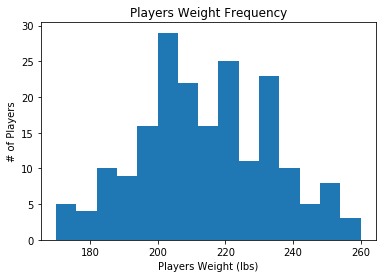

In [36]:
# Histogram to visually explore continuous data counts
hist = plt.hist(df_rosters_pirates.weight_lbs, bins = 15)
hist = plt.ylabel('# of Players')
hist = plt.xlabel('Player''s Weight (lbs)')
hist = plt.title('Player''s Weight Frequency')
plt.show()

To visually explore multiple variables we'll leverage boxplots, swarmplots and scatterplots. 

**Scatterplots** are a great way to compare across different categories when you have a numeric column, therefore two numeric columns are ideal.

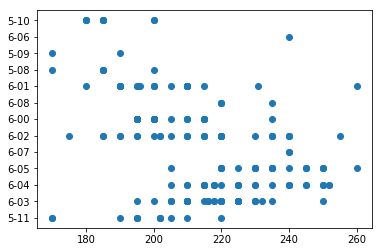

In [39]:
splot = plt.scatter(df_rosters_pirates.weight_lbs, df_rosters_pirates.height_ft)
plt.show()

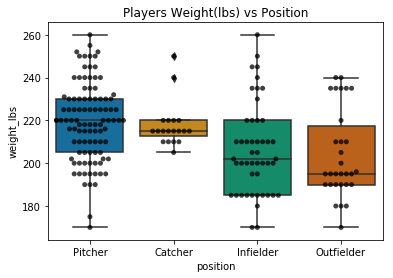

In [37]:
# Import Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot to visually explore discrete data counts

# Plot boxplot with seaborn to look for outliers in the data
bplot = sns.boxplot(y='weight_lbs', x='position', palette='colorblind', data=df_rosters_pirates)
bplot.set_xlabel('Player Position')
bplot.set_ylabel('Player Weight (Lbs)')
bplot.axes.set_title('Player''s Weight(lbs) vs Position')

# Add swarmplot to visualize the datapoints on the boxplot
bplot = sns.swarmplot(y='weight_lbs', x='position', color='black', data=df_rosters_pirates, alpha=0.75)

## Baseline Modeling

## Secondary Modeling

In [18]:
df_statcast_pirates_filtered = df_statcast_pirates.loc[:, ~df_statcast_pirates.columns.str.endswith('_deprecated')]

print(df_statcast_pirates_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23580 entries, 0 to 23579
Data columns (total 84 columns):
pitch_type                         23570 non-null object
game_date                          23580 non-null datetime64[ns]
release_speed                      23569 non-null float64
release_pos_x                      23569 non-null float64
release_pos_z                      23569 non-null float64
player_name                        23580 non-null object
batter                             23580 non-null int64
pitcher                            23580 non-null int64
events                             6112 non-null object
description                        23580 non-null object
spin_dir                           0 non-null float64
zone                               23569 non-null float64
des                                6113 non-null object
game_type                          23580 non-null object
stand                              23580 non-null object
p_throws                       